# <center> Task 6: Credit Card Default Prediction </center>

**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

filepath="C:/Users/uttam/anaconda3/Technocolabs/MinorProj2/Datasets/cleaned_data.csv"
df= pd.read_csv(filepath)

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [3]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'GENDER', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'DEFAULT']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['DEFAULT'].values,
    test_size=0.2, random_state=24
)

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [6]:
rf_hyperparameters = {'max_depth':[3, 6, 9, 12],
             'n_estimators':[10, 50, 100, 200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [7]:
from sklearn.model_selection import GridSearchCV
cv_rf = GridSearchCV(rf, param_grid=rf_hyperparameters, scoring='roc_auc',
                  n_jobs=-1, refit=True, cv=4, verbose=2,
                  error_score=np.nan, return_train_score=True)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [8]:
cv_rf.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  1.1min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [9]:
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)
cv_rf_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.221372,0.002060,0.012993,0.002343,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.739183,0.746599,0.772127,0.771322,0.757308,0.014656,15,0.767973,0.767158,0.760550,0.763683,0.764841,0.002955
1,1.112611,0.048271,0.052970,0.009455,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.748009,0.755878,0.779465,0.771250,0.763651,0.012379,12,0.775241,0.774025,0.765732,0.766947,0.770486,0.004191
2,2.008350,0.041752,0.070209,0.003268,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.747221,0.753924,0.779195,0.770937,0.762819,0.012811,13,0.774340,0.773598,0.766103,0.766914,0.770238,0.003750
3,3.799074,0.028665,0.135174,0.002163,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.747454,0.753057,0.777644,0.771729,0.762471,0.012550,14,0.774453,0.773534,0.766139,0.767404,0.770382,0.003653
4,0.342054,0.004915,0.012742,0.000830,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.752905,0.758904,0.780036,0.774017,0.766466,0.010980,11,0.795911,0.796476,0.793695,0.796446,0.795632,0.001141


**Find the best hyperparameters from the cross-validation.**

In [10]:
cv_rf_results_df.max()

mean_fit_time          12.708470
std_fit_time            0.055821
mean_score_time         0.290582
std_score_time          0.017701
param_max_depth        12.000000
param_n_estimators    200.000000
split0_test_score       0.765910
split1_test_score       0.767541
split2_test_score       0.790255
split3_test_score       0.783513
mean_test_score         0.776199
std_test_score          0.014656
rank_test_score        16.000000
split0_train_score      0.945018
split1_train_score      0.949378
split2_train_score      0.946415
split3_train_score      0.944689
mean_train_score        0.946375
std_train_score         0.004263
dtype: float64

In [11]:
cv_rf.best_params_

{'max_depth': 9, 'n_estimators': 200}

From max_depth: max_depth=9 looks the best. Also, trees=100 looks the best

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [12]:
# Create a 5x5 grid
xx_rf, yy_rf = np.meshgrid(range(5), range(5))

In [13]:
# Set color map to `plt.cm.jet`
cm_rf = plt.cm.jet

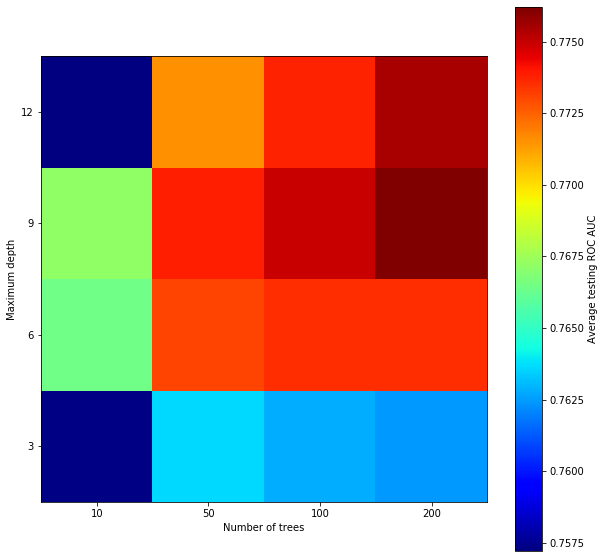

In [14]:
# Visualize pcolormesh
plt.figure(figsize=(10,10))
ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(xx_rf, yy_rf, cv_rf_results_df['mean_test_score'].values.reshape((4,4)), cmap=cm_rf)
plt.colorbar(pcolor_graph, label='Average testing ROC AUC')
ax_rf.set_aspect('equal')
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_xticklabels([str(tick_label) for tick_label in rf_hyperparameters['n_estimators']])
ax_rf.set_yticklabels([str(tick_label) for tick_label in rf_hyperparameters['max_depth']])
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')
plt.show()

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**
From the set of values: max_depth 9 looks the best to use.
100 trees gives the best ROC AUC value

In [15]:
# Create a dataframe of the feature names and importance
new_df= pd.DataFrame(df[features_response])
new_df

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,1,24,2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,26,-1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,34,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,1,37,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,2,1,57,-1,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,220000,3,1,39,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
26660,150000,3,2,43,-1,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
26661,30000,2,2,37,4,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
26662,80000,3,1,41,1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [16]:
# Sort values by importance
